<a href="https://colab.research.google.com/github/nguyenthithuylinh-ship-it/Diabetes_Project/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÁO CÁO PHÂN TÍCH VÀ ỨNG DỤNG HỌC MÁY TRONG DỰ ĐOÁN NGUY CƠ MẮC BỆNH ĐÁI THÁO ĐƯỜNG**



# **1.   Giới thiệu**


**Bối cảnh**<br>
Bộ dữ liệu này ban đầu đến từ Viện Quốc gia về Bệnh Tiểu đường, Tiêu hóa và Thận. Mục tiêu của bộ dữ liệu là dự đoán chẩn đoán xem bệnh nhân có mắc bệnh tiểu đường hay không, dựa trên một số chỉ số chẩn đoán có trong bộ dữ liệu. Việc lựa chọn các trường hợp này từ một cơ sở dữ liệu lớn hơn gặp một số hạn chế. Cụ thể, tất cả các bệnh nhân ở đây đều là nữ, ít nhất 21 tuổi, thuộc dân tộc người Pima.

**Nội dung**<br>
Bộ dữ liệu bao gồm một số biến dự đoán y tế và một biến mục tiêu là **`Outcome`**. Các biến dự đoán bao gồm **`Pregnancies`**, **`Glucose`**, **`BloodPressure`**, **`SkinThickness`**, **`Insulin`**, **`BMI`**, **`DiabetesPedigreeFunction`**, **`Age`**



# **2.   Nạp dữ liệu vào chương trình**


In [ ]:
#import Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import SMOTE

In [ ]:
#Nạp dữ liệu
url = "https://raw.githubusercontent.com/nguyenthithuylinh-ship-it/Diabetes_Project/refs/heads/main/data/diabetes.csv"
data = pd.read_csv(url)

In [ ]:
#Trả về tên của tất cả các cột trong DataFrame data
data.columns

**Ghi chú**

*   **`Pregnancies`**: số lần mang thai
*   **`Glucose`**: Nồng độ glucose trong huyết tương sau 2 giờ trong bài kiểm tra dung nạp glucose qua đường uống. Chỉ số này cho biết cơ thể có khả năng chuyển hóa đường hiệu quả sau khi uống glucose hay không.
*   **`BloodPressure`**: Huyết áp tâm trương (DBP). Là áp lực trong động mạch khi tim nghỉ giữa hai nhịp co, đo bằng mmHg.
*   **`SkinThickness`**: Độ dày nếp gấp da vùng cơ tam đầu (mm)
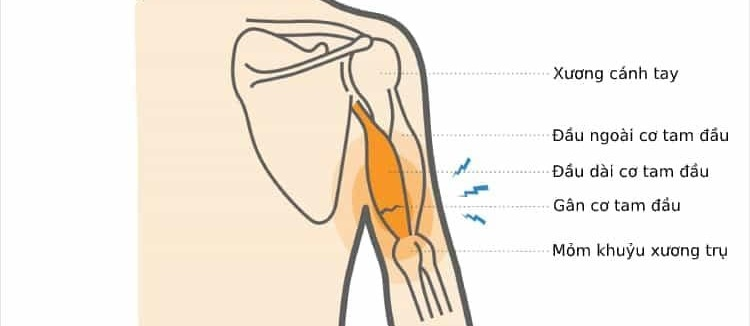
*   **`Insulin`**: Nồng độ insulin huyết thanh sau 2 giờ (mu U/ml). Chỉ số này dùng để đánh giá khả năng tiết insulin của tuyến tụy và kháng insulin, rất quan trọng trong nghiên cứu và chẩn đoán tiểu đường type 2. Cụ thể, chỉ số này được sử dụng trong Nghiệm pháp dung nạp glucose đường uống (OGTT). Sau khi cho bệnh nhân uống 75g glucose, người ta đo nồng độ insulin trong máu tại thời điểm trước khi uống và sau khi uống 2 giờ. Ý nghĩa của việc đo chỉ số này:

1.   Đánh giá khả năng tiết insulin của tuyến tụy: Một tuyến tụy khỏe mạnh sẽ phản ứng bằng cách tiết ra một lượng insulin đủ lớn sau khi uống glucose để điều hòa lượng đường trong máu. Nếu chỉ số insulin 2 giờ thấp, cho thấy chức năng tế bào beta của tuyến tụy suy giảm, không thể tiết đủ insulin.
2.   Đánh giá tình trạng kháng insulin: Trong giai đoạn đầu của tiền tiểu đường hoặc tiểu đường type 2, cơ thể thường bị kháng insulin. Để bù đắp, tuyến tụy phải làm việc quá sức và tiết ra rất nhiều insulin (hyperinsulinemia). Do đó, một chỉ số insulin 2 giờ cao bất thường là dấu hiệu mạnh mẽ của tình trạng kháng insulin.

*   **`BMI`**: Chỉ số khối cơ thể (BMI) – trọng lượng tính bằng kg chia bình phương chiều cao tính bằng mét. Dùng để đánh giá tình trạng cân nặng và mỡ cơ thể.Ý nghĩa trong y học:

1. BMI thấp → suy dinh dưỡng.

2. BMI bình thường → sức khỏe cân đối.

3. BMI cao → thừa cân, béo phì, là yếu tố nguy cơ quan trọng của tiểu đường type 2 và bệnh tim mạch.
*   **`DiabetesPedigreeFunction`**: Hàm phả hệ tiểu đường. Nó là một con số ước tính ảnh hưởng của di truyền đối với nguy cơ mắc bệnh tiểu đường type 2 của một cá nhân dựa trên tiền sử gia đình của họ. Một giá trị DPF càng cao cho thấy người đó có tiền sử gia đình mắc tiểu đường càng mạnh, đồng nghĩa với nguy cơ di truyền cao hơn.
*   **`Age`**: tuổi
*   **`Outcome`**: kết quả (0 = không mắc bệnh, 1 = mắc bệnh)
<br>

In [ ]:
#head() dùng để xem nhanh n dòng đầu tiên của DataFrame. Mặc định: data.head() sẽ hiển thị 5 dòng đầu tiên.
data.head()

In [ ]:
# tail() dùng để xem nhanh n dòng cuối cùng của DataFrame. Mặc định: data.tail() sẽ hiển thị 5 dòng cuối cùng.
data.tail()

In [ ]:
#Chọn ngẫu nhiên 5 hàng (rows) từ DataFrame data
data.sample(5)





# **3.   Phân loại đặc trưng**







*   Việc này giúp chọn được các biểu đồ thích hợp để trực quan hóa dữ liệu

**1️⃣ Categorical data (dữ liệu phân loại)**

*   **Định nghĩa:** Dữ liệu được đặt vào các nhóm (categories) sử dụng tên hoặc nhãn.
*   **Các kiểu categorical**<br>
    **1**. **Dữ liệu Danh nghĩa `(Nominal data)`**: Đặt tên hoặc nhãn cho các danh mục; giống như danh từ (naming data). Ví dụ: màu sắc, quốc gia<br>
    **2**. **Dữ liệu Thứ tự `(Ordinal data)`**: Bao gồm các yếu tố có thứ hạng, sắp xếp hoặc thang điểm đánh giá. Dữ liệu này có thể được sắp xếp và đếm nhưng không thể đo lường (ví dụ: xếp hạng: Low, Medium, High).

*   **Trực quan hóa (Visualization):** Chỉ sử dụng biểu đồ thanh (Bar charts) và biểu đồ tròn (Pie charts).
*   **Ví dụ:** Xác định giới tính (Nam, Nữ, Khác).<br>


**2️⃣ Numerical data (dữ liệu số)**

*   **Định nghĩa:** Dữ liệu được thể hiện bằng các con số, không phải bằng mô tả ngôn ngữ tự nhiên.
*   **Các kiểu Numerical**<br>
    **1. Dữ liệu Rời rạc `(Discrete Data)`:** Dữ liệu số có thể đếm được, ánh xạ một-một với số tự nhiên (ví dụ: tuổi, số học sinh trong lớp).<br>
    **2. Dữ liệu Liên tục `(Continuous Data)`:** Dữ liệu số không đếm được, biểu thị bằng một chuỗi các khoảng (ví dụ: CGPA, chiều cao).

*   **Trực quan hóa (Visualization):**  Sử dụng biểu đồ thanh (bar graphs), biểu đồ tròn (pie charts) và biểu đồ phân tán (scatter plots).
<br><br>



In [ ]:
#Xem kích thước của DataFrame
data.shape

In [ ]:
#Tóm tắt thông tin tổng quan của DataFrame
data.info()

**Ghi chú**

**Số dòng (entries) trong DataFrame:** 768, đánh index từ 0 → 767.

**Số cột:** 9 cột dữ liệu, bao gồm:

**Kiểu dữ liệu của mỗi cột:** float64(2), int64(7)
            

*   2 cột kiểu float64 → **`BMI`**, **`DiabetesPedigreeFunction`**.
*   7 cột kiểu int64.

**Số lượng giá trị không bị thiếu (non-null values) trên mỗi cột:** Tất cả 9 cột đều có 768 giá trị, nghĩa là không có giá trị bị thiếu (NaN).

**Dung lượng bộ nhớ mà DataFrame đang chiếm:** Bộ dữ liệu chiếm khoảng 54.1 KB bộ nhớ trong RAM.

**Categorical**: `Outcome`

**Numerical:**

*   Discrete: `Pregnancies`.
*   Continuous: `Age` (nhiều giá trị), `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`.



In [ ]:
#Số dòng trùng trong data.
data.duplicated().sum()

In [ ]:
#Số giá trị NaN (thiếu) trong từng cột của DataFrame
data.isnull().sum()

In [ ]:
# Kiểm tra kiểu dữ liệu ban đầu của Outcome
print(data.dtypes["Outcome"])


In [ ]:

# Chuyển Outcome sang categorical
data["Outcome"] = data["Outcome"].astype("category")
print(data.dtypes["Outcome"])

In [ ]:
data.info()

### **Phân bố giá trị của đặc trưng số trên toàn bộ các mẫu.**

In [ ]:
#Tóm tắt thống kê cơ bản của các dữ liệu số trong DataFrame
data.describe()

In [ ]:
#Tóm tắt thống kê của các cột kiểu category trong DataFrame
data.describe(include=['category'])

**Ghi chú**
- **Tổng số mẫu (quan sát)**: 768  
- **Cột `Outcome`**: gồm 2 giá trị duy nhất  
  - `0` → Nhóm **khỏe mạnh**  
  - `1` → Nhóm **tiểu đường**  
- **Tần suất phổ biến nhất**:  
  - `0` (khỏe mạnh) xuất hiện **500 lần** → chiếm đa số trong tập dữ liệu

# **4. Phân tích và khám phá dữ liệu (Exploratory Data Analysis - EDA)**

#### **Target: `Outcome`**

In [ ]:
#Đếm tần suất (số lần xuất hiện) của từng giá trị trong cột Outcome
data["Outcome"].value_counts().to_frame()

**Ghi chú**

*   500 mẫu (người không mắc tiểu đường).
*   268 mẫu (người mắc tiểu đường).
<br>

In [ ]:
# Tách dữ liệu theo Outcome

# D: bệnh nhân bị tiểu đường (Outcome != 0)
D = data[(data['Outcome'] != 0)]

# H: bệnh nhân khỏe mạnh (Outcome == 0)
H = data[(data['Outcome'] == 0)]


In [ ]:
def target_count():
    # Dữ liệu
    counts = data['Outcome'].value_counts().sort_index()  # giữ đúng thứ tự 0,1
    labels = ['healthy','diabetic']

    # Tạo biểu đồ
    fig = go.Figure(
        data = [
            go.Bar(
                x = labels,
                y = counts.values,
                text = counts.values,
                textfont = dict(size=15),
                textposition = 'auto',
                opacity = 0.8,
                width = 0.2,
                marker = dict(
                    color = ['#789DBC', '#FFE3E3'],
                    line = dict(color='#000000', width=1.5)
                )
            )
        ]
    )

    # Layout
    fig.update_layout(
        title = 'Count of Outcome variable',
        xaxis_title = 'Outcome',
        yaxis_title = 'Count',
        height = 600
    )

    # Hiển thị
    fig.show()

In [ ]:
#Gọi hàm để hiển thị biểu đồ
target_count()    # Biểu đồ số lượng

In [ ]:
#tính tỷ lệ (%) của từng giá trị trong cột Outcome.
data["Outcome"].value_counts(normalize=True).to_frame()

**Ghi chú**


*   Nhóm không mắc tiểu đường chiếm 65.1% dữ liệu
*   Nhóm mắc tiểu đường chiếm 34.9% dữ liệu
<br>



In [ ]:
def target_percent():
    # Tạo biểu đồ tròn từ cột "Outcome"
    fig = px.pie(
        data,
        names="Outcome",                        # Cột dùng để phân loại (0 = khỏe mạnh, 1 = bị bệnh)
        title="Distribution of Outcome variable",         # Tiêu đề biểu đồ
        color="Outcome",                        # Tô màu theo giá trị Outcome
        color_discrete_map={0: "#789DBC", 1: "#FFE3E3"}  # Gán màu cụ thể cho từng nhóm
    )

    # Tùy chỉnh hiển thị
    fig.update_traces(
        textfont=dict(size=15),                 # Cỡ chữ hiển thị % bên trong biểu đồ
        opacity=0.8,                            # Độ trong suốt của các lát cắt
        marker=dict(
            line=dict(color='#000000', width=1.5)  # Viền đen xung quanh từng lát
        )
    )

    # Hiển thị biểu đồ
    fig.show()

In [ ]:
#Gọi hàm để hiển thị biểu đồ tròn
target_percent()

In [ ]:
def plot_distribution(data_select, size_bin):
    """
    Hàm vẽ biểu đồ phân bố (histogram + density plot) cho một biến số,
    so sánh hai nhóm dữ liệu: diabetic vs healthy

    data_select : tên cột muốn vẽ
    size_bin    : kích thước bin của histogram
    """
    # Lấy dữ liệu từ 2 nhóm
    tmp1 = D[data_select]  # Nhóm bệnh nhân tiểu đường
    tmp2 = H[data_select]  # Nhóm người khỏe mạnh
    hist_data = [tmp1, tmp2]

    # Nhãn và màu sắc cho từng nhóm
    group_labels = ['diabetic', 'healthy']
    colors = ['#FF96AD', '#005A8D']

    # Tạo biểu đồ phân bố
    fig = ff.create_distplot(
        hist_data,
        group_labels,
        colors=colors,
        show_hist=True,
        bin_size=size_bin,
        curve_type='kde'
    )

    # Cập nhật tiêu đề
    fig.update_layout(title=data_select)

    # Hiển thị biểu đồ
    fig.show()

#### **Variable: `Insulin`**

In [ ]:
#Gọi hàm tự plot_distribution để vẽ phân phối (distribution) của cột Insulin trong DataFrame
plot_distribution('Insulin', 0)

**Ghi chú phân bố Insulin**

**1. Phân bố:**  
- Cả hai nhóm (khỏe mạnh và tiểu đường) đều có nồng độ Insulin chủ yếu ở mức thấp.  
- Nhóm khỏe mạnh: phân phối tập trung, cao hơn ở mức thấp.  
- Nhóm tiểu đường: phân phối phẳng, trải rộng hơn.

**2. Sự trùng lặp:**  
- Nồng độ Insulin của hai nhóm có sự chồng chéo lớn.  
- Điều này cho thấy **chỉ dựa vào Insulin không thể phân biệt rõ ràng người mắc bệnh và người không mắc bệnh**.

**3. Giá trị ngoại lệ:**  
- Một số cá nhân trong nhóm tiểu đường có nồng độ Insulin cực kỳ cao (>800).  
- Hiện tượng này không thấy ở nhóm khỏe mạnh.  

**4. Kết luận:** Insulin có thể là một yếu tố để phân biệt giữa người khỏe mạnh và người tiểu đường, nhưng không phải là một yếu tố quyết định.

####**Variable: `Glucose`**

In [ ]:
plot_distribution('Glucose', 0)

**Ghi chú phân bố Glucose**

**1. Phân bố:**  
- Nhóm khỏe mạnh: nồng độ Glucose thấp hơn và tập trung hơn (đỉnh khoảng 105-109).  
- Nhóm tiểu đường: phân bố rộng hơn, nồng độ trung bình cao hơn (đỉnh khoảng 120-129).

**2. Sự phân biệt:**  
- So với Insulin, Glucose là **chỉ số mạnh hơn** để phân biệt hai nhóm.  
- Mặc dù có một số trùng lặp, hầu hết các giá trị Glucose cao đều thuộc về người mắc bệnh tiểu đường.

**3. Kết luận:** Nồng độ Glucose là một yếu tố dự đoán rất mạnh cho bệnh tiểu đường.

####**Variable: `SkinThickness`**

In [ ]:
plot_distribution('SkinThickness', 10)

**Ghi chú phân bố SkinThickness**

**1. Phân bố:**  
- Cả hai nhóm (khỏe mạnh và tiểu đường) đều có phân bố tương đối giống nhau.  
- Sự trùng lặp giữa hai nhóm là **rất lớn**.

**2. Sự phân biệt:**  
- Chỉ số **SkinThickness không đủ mạnh** để phân biệt hai nhóm.  
- Không có sự khác biệt rõ rệt về độ dày da giữa người mắc bệnh và người không mắc bệnh.

**3. Kết luận:**  
- Độ dày da là một **chỉ số yếu** và **không nên dùng độc lập** để chẩn đoán bệnh tiểu đường.


####**Variable: `BloodPressure`**

In [ ]:
plot_distribution('BloodPressure', 5)

**Ghi chú phân bố BloodPressure**

**1. Phân bố:**  
- Nhóm tiểu đường có huyết áp trung bình cao hơn một chút so với nhóm khỏe mạnh.  
- Tuy nhiên, sự khác biệt này **không rõ ràng**.

**2. Trùng lặp:**  
- Có **sự trùng lặp rất lớn** giữa hai nhóm.  
- Điều này khiến huyết áp **không hiệu quả** để phân biệt hai nhóm.

**3. Giá trị bất thường:**  
- Một số trường hợp có huyết áp gần bằng 0, **có thể là lỗi dữ liệu**.

**4. Kết luận:**  
- Mặc dù nhóm tiểu đường có xu hướng huyết áp cao hơn,  
- **Sự trùng lặp lớn** cho thấy chỉ số này **không đủ mạnh** để phân biệt bệnh nhân và người khỏe mạnh.


####**Variable: `BMI`**

In [ ]:
plot_distribution('BMI', 0)

**Ghi chú phân bố BMI**

**1. Phân bố:**  
- Nhóm tiểu đường có **BMI trung bình cao hơn rõ rệt** so với nhóm khỏe mạnh.  
- Đỉnh phân phối của nhóm tiểu đường dịch chuyển sang phải, thể hiện **mối liên hệ giữa BMI cao và bệnh tiểu đường**.

**2. Trùng lặp:**  
- Mặc dù có sự trùng lặp, **sự khác biệt về vị trí đỉnh phân phối vẫn rõ ràng**, cho thấy BMI là **chỉ số phân biệt tốt** giữa hai nhóm.

**3. Điểm ngoại lệ:**  
- Tỷ lệ người có **BMI rất cao** ở nhóm tiểu đường lớn hơn nhiều so với nhóm khỏe mạnh.

**4. Kết luận:**  
- **BMI càng cao, nguy cơ mắc bệnh tiểu đường càng lớn.**  
- Đây là một **chỉ số mạnh** để dự đoán bệnh, đặc biệt khi kết hợp với các yếu tố khác như Glucose.


####**Variable: `Age`**

In [ ]:
plot_distribution('Age', 0)

**Ghi chú phân bố Age**

**1. Phân bố:**  
- Nhóm khỏe mạnh chủ yếu là người trẻ (đỉnh ở 20-30 tuổi).  
- Nhóm tiểu đường có phân bố rộng hơn và dịch chuyển sang tuổi cao hơn (đỉnh ở 30-45 tuổi).

**2. Mối liên hệ:**  
- **Tuổi càng cao, nguy cơ mắc bệnh tiểu đường càng lớn.**  
- Tỉ lệ mắc bệnh tăng dần theo tuổi, đặc biệt sau 30 tuổi.

**3. Kết luận:**  
- Tuổi tác **không phải là chỉ số quyết định duy nhất**, nhưng là yếu tố quan trọng kết hợp với các chỉ số khác như Glucose và BMI sẽ giúp **tăng độ chính xác**.


####**Variable: `Pregnancies`**

In [ ]:
plot_distribution('Pregnancies', 0)

**Ghi chú phân bố Pregnancies**

**1. Phân bố:**  
- Nhóm khỏe mạnh có đỉnh phân phối cao ở **1 lần mang thai**.  
- Nhóm tiểu đường có phân bố **rộng hơn và phẳng hơn**.

**2. Mối liên hệ:**  
- Tỷ lệ mắc bệnh tiểu đường **cao hơn ở phụ nữ có nhiều lần mang thai** (từ 6 lần trở lên).

**3. Điểm ngoại lệ:**  
- Nhóm tiểu đường có các trường hợp **số lần mang thai rất cao** (lên đến 17), không xuất hiện ở nhóm khỏe mạnh.

**4. Kết luận:**  
- Mặc dù có sự trùng lặp, **số lần mang thai vẫn là yếu tố hữu ích**,  
- Đặc biệt khi kết hợp với các chỉ số mạnh hơn như **Glucose và BMI** để dự đoán nguy cơ mắc bệnh.


####**Variable: `DiabetesPedigreeFunction`**

In [ ]:
plot_distribution('DiabetesPedigreeFunction', 0)

**Ghi chú phân bố DiabetesPedigreeFunction (DPF)**

**1. Lệch phải:**  
- Cả hai nhóm đều có đa số giá trị DPF **tập trung ở mức thấp**, cho thấy phần lớn không có tiền sử gia đình mạnh về bệnh tiểu đường.

**2. Đỉnh phân phối:**  
- Nhóm khỏe mạnh: đỉnh cao hơn và tập trung ở **DPF rất thấp** (gần 0).  
- Nhóm tiểu đường: đỉnh thấp hơn và dịch chuyển sang phải, thể hiện **xu hướng có tiền sử gia đình về bệnh**.

**3. Trùng lặp:**  
- Hai nhóm có **sự trùng lặp lớn** về giá trị DPF, khiến phân biệt chỉ dựa vào chỉ số này **khó khăn**.

**4. Mối liên hệ:**  
- Khi **DPF tăng lên**, tỷ lệ người mắc bệnh tiểu đường cũng **tăng đáng kể**, đặc biệt ở mức **DPF ≥ 0.5**.

**5. Ngoại lệ:**  
- Nhóm tiểu đường có các giá trị DPF rất cao (lên đến 2.5), cho thấy **tiền sử gia đình mạnh là yếu tố nguy cơ đáng kể**.

**6. Kết luận:**  
- DPF là một **yếu tố dự đoán hữu ích**, đặc biệt khi giá trị cao.  
- Mặc dù có sự trùng lặp, biểu đồ vẫn cho thấy **mối liên hệ rõ ràng giữa tiền sử gia đình và nguy cơ mắc bệnh**.

In [ ]:
#Vẽ nhiều boxplot cho tất cả các cột số trong DataFrame
numeric_columns = data.select_dtypes(include="number").columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data[col], ax=axes[i], color='#789DBC')  # dùng color thay cho palette
    axes[i].set_title(f"Boxplot of {col}")

# Ẩn các ô trống thừa
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Ghi chú**

- **Phân bố đồng đều**:  
  Các chỉ số **`Glucose`**, **`BMI`**, và **`Age`** có phân bố tương đối tập trung và sạch, cho thấy chúng là các chỉ số có giá trị cao để phân tích.  

- **Nhiều giá trị ngoại lệ**:  
  Ngược lại, **`Insulin`** và **`DiabetesPedigreeFunction`** có rất nhiều giá trị ngoại lệ, cho thấy dữ liệu của hai chỉ số này phân tán mạnh và có thể cần làm sạch trước khi phân tích.  

- **Giá trị bất thường**:  
  Một số chỉ số như **`BloodPressure`**, **`Glucose`**, **`BMI`**, **`SkinThickness`**, **`Insulin`** có các giá trị **0**, đây có thể là lỗi dữ liệu cần được xử lý.


In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in data.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome', y=feature, data=data,
                    hue='Outcome', palette=['#789DBC', '#FFE3E3'], legend=False)
plt.show()


**Ghi chú**

- **Chỉ số dự đoán mạnh**:  
  - **`Glucose`**, **`BMI`**, **`Age`**, và **`Pregnancies`**  
  - Các hộp và giá trị trung vị của nhóm **tiểu đường** cao hơn hẳn so với nhóm **khỏe mạnh**  
  → Cho thấy mối liên hệ chặt chẽ với bệnh tiểu đường.  

- **Chỉ số dự đoán yếu**:  
  - **`BloodPressure`**, **`Insulin`**, và **`SkinThickness`**  
  - Có sự trùng lặp lớn giữa hai nhóm  
  → Không phải là yếu tố phân biệt hiệu quả.  

- **Điểm bất thường**:  
  - Xuất hiện các giá trị **không hợp lý (0)** ở **`Glucose`**, **`BloodPressure`**, **`BMI`**  
  - Nhiều giá trị **ngoại lệ rất cao** ở **`Insulin`**, **`DiabetesPedigreeFunction`**, và **`BMI`**  
  → Cần được xử lý và làm sạch trước khi phân tích.

#### **Ma trận tương quan**

*Ma trận tương quan (Correlation Matrix) là một bảng hiển thị các hệ số tương quan giữa các tập hợp biến. Mỗi biến ngẫu nhiên (Xi) trong bảng được so sánh tương quan với từng giá trị khác trong bảng (Xj). Điều này giúp bạn thấy được các cặp biến nào có mức tương quan cao nhất.*

In [ ]:
def correlation_plot(data):
    """
    Hiển thị ma trận tương quan giữa các biến số trong DataFrame.
    """
    # Tính ma trận tương quan (correlation) giữa các cột numerical
    corr = data.corr()

    # Làm tròn giá trị để hiển thị trên ô (2 chữ số thập phân)
    corr_rounded = corr.round(2)

    # Tạo heatmap bằng Plotly
    fig = go.Figure(
        go.Heatmap(
            z=corr.values,               # Giá trị đầy đủ cho hover
            x=corr.columns,              # Nhãn cột trên trục X
            y=corr.columns,              # Nhãn cột trên trục Y
            colorscale='RdBu',           # Bảng màu đỏ-xanh
            zmin=-1, zmax=1,             # Giới hạn giá trị tương quan
            text=corr_rounded.values,    # Số hiển thị trực tiếp trên ô
            texttemplate="%{text}",      # Template hiển thị text
            textfont={"size":10},        # Kích thước chữ trên ô
            colorbar=dict(title="Correlation")  # Chú thích màu
        )
    )

    # Cập nhật layout cho figure
    fig.update_layout(
        title="Correlation Matrix for Variables",  # Tiêu đề biểu đồ
        xaxis=dict(tickangle=45),                  # Xoay nhãn trục X 45 độ
        yaxis=dict(autorange="reversed"),         # Đảo trục Y để hiển thị từ trên xuống
        height=600                                 # Chiều cao figure
    )

    # Hiển thị biểu đồ
    fig.show()

In [ ]:
#Gọi hàm correlation_plot
correlation_plot(data)

**Ghi chú**<br>


*   **`Glucose`** có tương quan cao nhất với **`Outcome`** (0.49) → yếu tố quan trọng nhất để dự đoán tiểu đường.

*   **`BMI`** (0.31), **`Insulin`** (0.30), **`SkinThickness`** (0.26), **`Age`** (0.24), **`Pregnancies`** (0.22) → có ảnh hưởng mức vừa.

*   **`BloodPressure`** và **`DiabetesPedigreeFunction`** → tương quan rất yếu với Outcome.
*   **`SkinThickness`** – **`BMI`** (0.65), **`Glucose`** – **`Insulin`** (0.58), **`Age`** – **`Pregnancies`** (0.54) → có tương quan khá mạnh.


*  **Nhận xét:** Glucose là biến dự báo quan trọng nhất, BMI và Insulin cũng đáng chú ý; các yếu tố khác tác động yếu hơn.

#**5. Tiền xử lý dữ liệu**

### **Giá trị bị thiếu**

*Một số cột có giá trị 0, nhưng về mặt ý nghĩa thì không hợp lý (ví dụ: huyết áp, độ dày da, insulin, BMI…), nên 0 thực chất là giá trị thiếu (missing value).*<br>
*Lý do: giá trị 0 không hợp lý trong dữ liệu y tế. Thay bằng np.nan để biểu thị dữ liệu bị thiếu và xử lý sau này*

In [ ]:
#Thay thế giá trị 0 bằng nan cho các cột 'Glucose','BloodPressure','SkinThickness','Insulin','BMI'
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [ ]:
#Hàm vẽ biểu đồ cột kiểm tra giá trị thiếu trong dataset.
def missing_plot(dataset, keys):
    """
    - dataset: DataFrame chứa dữ liệu
    - keys: tên cột hoặc danh sách cột muốn kiểm tra
    """

    # Nếu chỉ là 1 cột, chuyển thành danh sách để xử lý đồng nhất
    if isinstance(keys, str):
        keys = [keys]

    # Tính số lượng giá trị không thiếu cho từng cột
    not_null_count = dataset[keys].notnull().sum()

    # Tính tỷ lệ phần trăm giá trị thiếu
    missing_percent = (dataset[keys].isnull().sum() / len(dataset) * 100).round(2)

    # Tạo biểu đồ cột với Plotly
    fig = go.Figure(
        data = [
            go.Bar(
                x = keys,                                   # Tên các cột
                y = not_null_count.values,                  # Số lượng giá trị không thiếu
                text = missing_percent.astype(str) + '%',   # Hiển thị % giá trị thiếu
                textposition = 'auto',                      # Vị trí text trên cột
                opacity = 0.8,                              # Độ mờ của cột
                marker = dict(
                    color = '#789DBC',                      # Màu cột
                    line = dict(color='#000000', width=1.5) # Viền cột màu đen
                )
            )
        ]
    )

    # Cài đặt layout cho biểu đồ
    fig.update_layout(
        title = "Missing Values",
        xaxis_title = "Features",
        yaxis_title = "Count",
        height = 600
    )

    # Hiển thị biểu đồ
    fig.show()

In [ ]:
#Gọi hàm để hiển thị missing plot
missing_plot(data, data.columns) # Dataset là data và muốn kiểm tra tất cả cột

**Ghi chú**:

*   **Glucose:** 5 giá trị thiếu (0.65%)

*   **BloodPressure:** 35 giá trị thiếu (4.56%)

*   **SkinThickness:** 227 giá trị thiếu (29.56%)

*   **Insulin:** 374 giá trị thiếu (48.7%)

*   **BMI:** 11 giá trị thiếu (1.43%)<br>











In [ ]:
def overview_boxplot_modern(data):
    """
    Vẽ boxplot tổng quan cho tất cả các biến số trong DataFrame.
    """
    # Style hiện đại, nền sáng
    sns.set_theme(style="whitegrid")

    # Tạo figure và axes
    plt.figure(figsize=(12, 8))

    # Vẽ boxplot ngang, tự động scale trục X theo dữ liệu
    sns.boxplot(data=data, orient='v', palette='Blues')

    # Tiêu đề và nhãn trục
    plt.title("Overview of Data Set", fontsize=16)
    plt.xlabel("Values")
    plt.ylabel("Variables")

    # Hiển thị
    plt.tight_layout()
    plt.show()

In [ ]:
overview_boxplot_modern(data)

**Ghi chú**
*Tất cả các giá trị 0 đã được thay thành NaN.*

### **Thay giá trị NaN**

**Giá trị NaN trong dữ liệu có thể được xử lý bằng nhiều cách:**

**1.   Xóa hoặc thay thế trực tiếp**


*   Xóa hàng hoặc cột chứa NaN.
*   Thay bằng giá trị cố định, ví dụ 0 hoặc 'unknown'.


**2.   Thay thế theo đặc tính dữ liệu**


*   **`Dữ liệu số: dùng trung bình (mean) hoặc trung vị (median).`**
*   Dữ liệu phân loại: dùng giá trị xuất hiện nhiều nhất (mode).


**3.   Phương pháp nâng cao**


*   Dự đoán giá trị thiếu bằng mô hình.
*   Thay theo nhóm (group-wise imputation).


*   Nội suy (interpolation) cho dữ liệu theo thời gian.
<br>


Để điền các giá trị NaN này, cần hiểu phân phối dữ liệu theo **`Outcome`**.


**Phân bố dữ liệu (distribution):** cách các giá trị của một đặc trưng (feature) được sắp xếp, trải rộng ra sao (ví dụ: trung bình, min, max, hình dạng histogram).

**Biến mục tiêu (target):** cột muốn dự đoán, trong bài này là Outcome (0 = không tiểu đường, 1 = tiểu đường).

**Phân bố dữ liệu so với biến mục tiêu, tức là:** so sánh cách phân bố của một feature giữa các nhóm khác nhau của target.

**Ví dụ:**

Trong dataset: Glucose là feature. Outcome (0 = khỏe, 1 = bệnh tiểu đường) là target.

So sánh phân bố Glucose giữa Outcome = 0 và Outcome = 1 giúp thấy liệu nồng độ Glucose có liên quan đến bệnh không.
<br><br>

### **Thay thế NaN bằng giá trị trung vị theo nhóm** **`Outcome`**

*Giữ sự khác biệt giữa các nhóm, điền median riêng cho nhóm Outcome 0 và Outcome 1.*

*Điều này giúp duy trì sự khác biệt đặc trưng giữa nhóm khỏe mạnh và nhóm bệnh, trong khi mean của toàn bộ dữ liệu sẽ làm “mềm” sự khác biệt này*  

In [ ]:
def median_target(var):
    '''Tính giá trị trung vị (median) của một biến theo từng nhóm Outcome'''
    temp = data[data[var].notnull()]  # lọc giá trị hợp lệ
    temp = (
        temp[[var, 'Outcome']]
        .groupby(['Outcome'], observed=False)[[var]]  # thêm observed=False
        .median()
        .reset_index()
    )
    return temp

#### **`Insulin`**

In [ ]:
#Gọi hàm tính giá trị trung vị (median) của cột Insulin trong từng nhóm Outcome
median_target('Insulin')

In [ ]:
#Điền giá trị thiếu (NaN) cho cột Insulin dựa trên trung vị của từng nhóm Outcome

# Nhóm Outcome = 0, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 0) & (data['Insulin'].isnull()), 'Insulin'] = 102.5

# Nhóm Outcome = 1, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 1) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

#### **`Glucose`**

In [ ]:
#Gọi hàm tính giá trị trung vị (median) của cột Glucose trong từng nhóm Outcome
median_target('Glucose')

In [ ]:
#Điền giá trị thiếu (NaN) cho cột Glucoso dựa trên trung vị của từng nhóm Outcome

# Nhóm Outcome = 0, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107

# Nhóm Outcome = 1, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

#### **`SkinThickness`**

In [ ]:
#Gọi hàm tính giá trị trung vị (median) của cột SkinThickness trong từng nhóm Outcome
median_target('SkinThickness')

In [ ]:
#Điền giá trị thiếu (NaN) cho cột  SkinThickness dựa trên trung vị của từng nhóm Outcome

# Nhóm Outcome = 0, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27

# Nhóm Outcome = 1, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

**`BloodPressure`**

In [ ]:
#Gọi hàm tính giá trị trung vị (median) của cột BloodPressure trong từng nhóm Outcome
median_target('BloodPressure')

In [ ]:
#Điền giá trị thiếu (NaN) cho cột  BloodPressure dựa trên trung vị của từng nhóm Outcome

# Nhóm Outcome = 0, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70

# Nhóm Outcome = 1, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

#### **`BMI`**

In [ ]:
#Gọi hàm tính giá trị trung vị (median) của cột BMI trong từng nhóm Outcome
median_target('BMI')

In [ ]:
#Điền giá trị thiếu (NaN) cho cột  BMI dựa trên trung vị của từng nhóm Outcome

# Nhóm Outcome = 0, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1

# Nhóm Outcome = 1, điền NaN bằng median nhóm này
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [ ]:
#Gọi hàm missing plot để kiểm tra giá trị thiếu trong dataset sau khi thay giá trị NaN
missing_plot(data, keys=data.columns.tolist())

**Ghi chú:** Tất cả các đặc trưng (features) đều đã đầy đủ

#**6. Xây dựng và biến đổi đặc trưng**

In [ ]:
def plot_feat1_feat2(feat1, feat2) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers',
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [ ]:
def barplot(var_select, sub):
    tmp1 = data[data['Outcome'] != 0]
    tmp2 = data[data['Outcome'] == 0]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select], data['Outcome']))
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    # Trace cho diabetic
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().index.tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition='auto',
        name='diabetic',
        opacity=0.8,
        marker=dict(
            color='gold',
            line=dict(color='#000000', width=1)
        )
    )

    # Trace cho healthy
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().index.tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition='auto',
        name='healthy',
        opacity=0.8,
        marker=dict(
            color='lightskyblue',
            line=dict(color='#000000', width=1)
        )
    )

    # Trace cho % diabetic
    trace3 = go.Scatter(
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis='y2',
        name='% diabetic',
        opacity=0.6,
        marker=dict(
            color='black',
            line=dict(color='#000000', width=0.5)
        )
    )

    # Layout
    layout = dict(
        title=str(var_select) + ' ' + sub,
        xaxis=dict(),
        yaxis=dict(title='Count'),
        yaxis2=dict(
            range=[0, 75],
            overlaying='y',
            anchor='x',
            side='right',
            zeroline=False,
            showgrid=False,
            title='% diabetic'
        )
    )

    # Tạo figure và vẽ
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)


In [ ]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]

    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']

    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))


    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [ ]:
plot_feat1_feat2('Glucose','Age')

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [ ]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [ ]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [ ]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

In [ ]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

In [ ]:
barplot('N2', ': BMI <= 30')

In [ ]:
plot_pie('N2', 'BMI <= 30')

In [ ]:
plot_feat1_feat2('Pregnancies','Age')

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [ ]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

In [ ]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [ ]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

In [ ]:
plot_feat1_feat2('Glucose','BloodPressure')

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BloodPressure'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [ ]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [ ]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [ ]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

In [ ]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [ ]:
barplot('N5', ':SkinThickness <= 20')

In [ ]:
plot_pie('N5', 'SkinThickness <= 20')

In [ ]:
plot_feat1_feat2('SkinThickness','BMI')

In [ ]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [ ]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [ ]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

In [ ]:
plot_feat1_feat2('Glucose','BMI')

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [ ]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [ ]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [ ]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

In [ ]:
plot_distribution('Insulin', 0)

In [ ]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

In [ ]:
barplot('N9', ': Insulin < 200')

In [ ]:
plot_pie('N9', 'Insulin < 200')

In [ ]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [ ]:
barplot('N10', ': BloodPressure < 80')

In [ ]:
plot_pie('N10', 'BloodPressure < 80')

In [ ]:
plot_distribution('Pregnancies', 0)

In [ ]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [ ]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [ ]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

In [ ]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']

In [ ]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

In [ ]:
plot_distribution('N0', 0)

In [ ]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [ ]:
barplot('N15', ': N0 < 1034')

In [ ]:
plot_pie('N15', 'N0 < 1034')

In [ ]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])

#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [ ]:
def correlation_plot():
    import numpy as np
    import plotly.graph_objs as go
    import plotly.offline as py

    # Correlation
    correlation = data.corr()

    # Tick labels
    matrix_cols = correlation.columns.tolist()

    # Convert to array
    corr_array = np.array(correlation)

    # Heatmap trace
    trace = go.Heatmap(
        z=corr_array,
        x=matrix_cols,
        y=matrix_cols,
        colorscale='Viridis',
        colorbar=dict()
    )

    # Layout
    layout = go.Layout(
        title='Correlation Matrix for variables',
        margin=dict(r=0, l=100, t=0, b=100),
        yaxis=dict(tickfont=dict(size=9)),
        xaxis=dict(tickfont=dict(size=9))
    )

    # Figure
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)


In [ ]:
correlation_plot()

In [ ]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
data.info()

In [ ]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# MÔ HÌNH SVM

# MÔ HÌNH KNN

# MÔ HÌNH Logistic Regression

# MÔ HÌNH Random Forest